# Evaluating Applied Cuts
This notebook will apply some of the rough manual cuts found via research in previous notebooks (and detailed in the lab book). It will then look to evaluate the performance of these cuts across both the simulated data and the real background data from now on simulated data will be referred to as SD and real background data as RD.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Consts, Data, Cut, Plots
%matplotlib inline

In [2]:
SFNAME, SSUFFIX = Consts().get_simulated_tuple()
RFNAME, RSUFFIX = Consts().get_real_tuple()
sd = Data(SFNAME, SSUFFIX)
rd = Data(RFNAME, RSUFFIX)

In [3]:
sdc, rdc = Cut(sd), Cut(rd)

In [4]:
d = sd.fetch_features(['L1_PX'])
len(d)

21727

## Implementing Cuts
Now all the initial setup is done we actually apply some of the cuts on the data and plot some of the invariant mass distributions each time to see how this has affected anything. Some basic statistics are also output. Firstly though we fetch the backgroud category feature from the simulated data and categorise all the events so when we plot them we can distinguish them. We define 1 as a signal event and 0 as a background event.

## ProbNN Cuts
The cuts we will be implementing and evaluating are given below (notice firstly we will apply one at a time then reset and then apply the next to evaluate each distinctly). These cuts are phrased such that anything meeting the criteria is retained.
- $P(K=p)\leq0.4921$,
- $P(K=K)\geq0.5398$,
- $P(e=p)\leq0.4306$,
- $P(e=K)\leq0.7197$

In [11]:
def invariant_mass_plot(data_objects, bins=100, normalised=True, save=None):
    """
    Parameters
    ----------
    data_objects : list
        A list of Data objects which contain information about some set of data, typically simulated or real.
        Should be a list of [simulated, signal]
    """
    s, r = data_objects[0], data_objects[1]
    
    bin_set = np.linspace(3750, 6900, bins) # Generate an array of bin edges so all histograms are consistent
    fig, ax = plt.subplots(1, 1, figsize=(9, 7)) # Create the figure and axis objects
    
    s.fetch_features(["Lb_BKGCAT", "Lb_M"])  
    s.get_data()['Category'] = np.where(data_objects[0].get_data()['Lb_BKGCAT'].isin([10, 50]), 1, 0)
    s.get_data().drop('Lb_BKGCAT', axis=1, inplace=True)
    g = s.get_data().groupby('Category')
    d1 = ax.hist(g.get_group(1)['Lb_M'], histtype='bar', bins=bin_set, edgecolor='k', alpha=0.7, label='Simulated Signal', density=normalised)
    d2 = ax.hist(g.get_group(0)['Lb_M'], histtype='bar', bins=bin_set, edgecolor='k', alpha=0.7, label='Simulated Background', density=normalised)
    df = r.get_data(['Lb'], 'M')
    d3 = ax.hist(df['Lb_M'], histtype='bar', bins=bin_set, edgecolor='k', alpha=0.7, label='Real Background', density=normalised)
    plt.xlabel('Invariant Mass (MeV)')
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    if save is not None:
        plt.savefig(save)
    plt.show()
    return [d1, d2, d3]

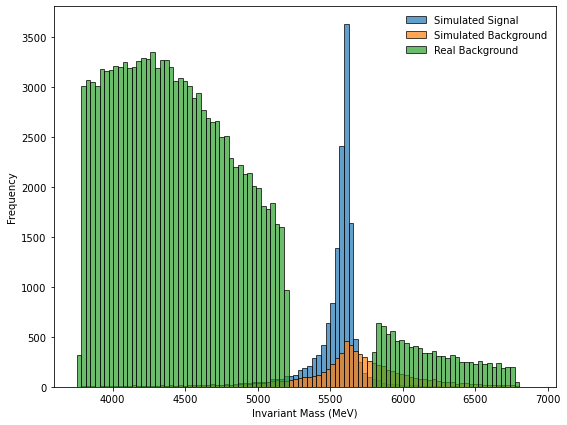

In [12]:
start = invariant_mass_plot([sd, rd], normalised=False, save='/home/user211/project/images/mass_plots/inital.png')

### Cut 1

In [7]:
sdc.probnn_cut('K', 0.4921, 'p', type='gt')
rdc.probnn_cut('K', 0.4921, 'p', type='gt')


Cut made!
Events Removed: 3033
Fractional Decrease in Events: 0.1395958945091361
Percentage of All Events Left: 86.040%


Cut made!
Events Removed: 2249
Fractional Decrease in Events: 0.01691308075262833
Percentage of All Events Left: 98.309%



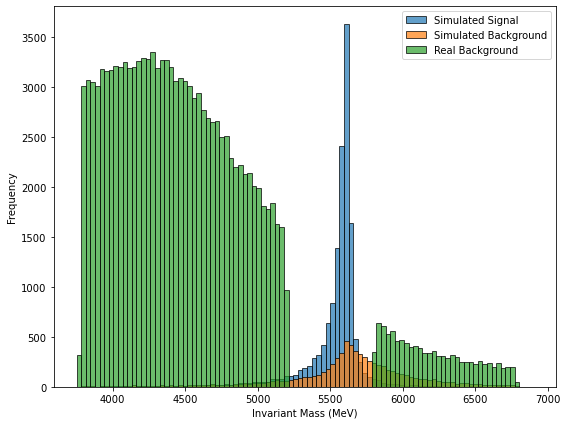

In [8]:
a = invariant_mass_plot([sd, rd], normalised=False, save='/home/user211/project/images/mass_plots/K_ProbNNp.png')

### Cut 2

In [9]:
sdc.probnn_cut('K', 0.5398, 'k', type='lt')
rdc.probnn_cut('K', 0.5398, 'k', type='lt')


Cut made!
Events Removed: 11488
Fractional Decrease in Events: 0.5287430386155475
Percentage of All Events Left: 47.126%


Cut made!
Events Removed: 103749
Fractional Decrease in Events: 0.7802201934212704
Percentage of All Events Left: 21.978%



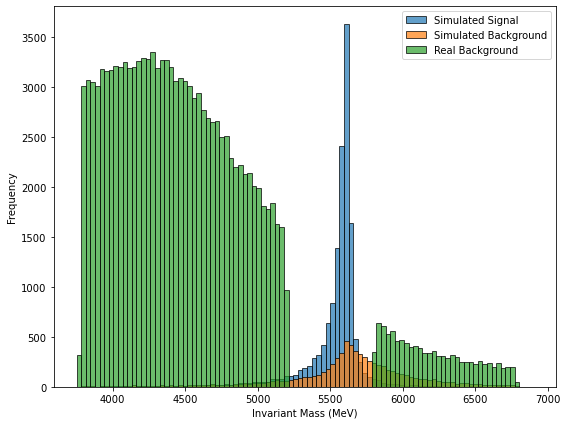

In [10]:
a = invariant_mass_plot([sd, rd], normalised=False, save='/home/user211/project/images/mass_plots/K_ProbNNk.png')